I will generate an ultrarealistic image of a toddler wearing the given dark blue short-sleeved shirt, buttoned up. The toddler will also be wearing light beige chino pants and brown leather sandals. The person will be standing against a plain light grey background, suitable for an e-commerce product display.




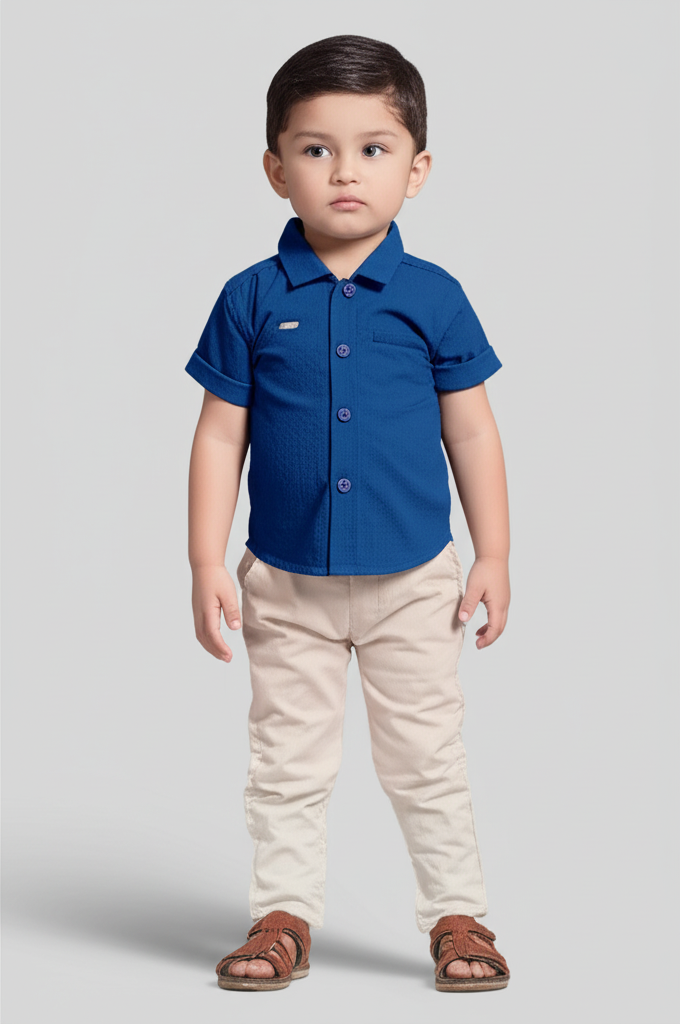

In [2]:
from google import genai
from google.genai import types
from io import BytesIO
from dotenv import load_dotenv
import os
import PIL.Image

load_dotenv()

image = PIL.Image.open('sample_images\sample_4.jpg')

client = genai.Client(api_key=os.getenv("GEMINI_API_KEY"))

text_input = ('The given is an image of a piece of clothing. I want you to generate a ultrarealistic image of the clothing on a person.',
              'You must strictly make sure that the clothing is represented exactly how is given in the reference image.',
              'You must show the person completely from head to toes and if any necessary piece of clothing is missing (such as a bottom from an image of a top), you may add as appropriate.',
              'The generated image is to be used to display the item on an ecommerce website so keep that in mind when generating it.')
response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents=[text_input, image],
    config=types.GenerateContentConfig(
      response_modalities=['TEXT', 'IMAGE']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    print(part.text)
  elif part.inline_data is not None:
    image = PIL.Image.open(BytesIO((part.inline_data.data)))
    display(image)